In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import os

In [2]:


### load all test dataset and get mean values in confusion matrix


# linear-sleepedf-AASM-pool1.pt
# linear-sleepedf-AASM-pool1-preprocessed-emg.pt
# linear-sleepedf-AASM-pool1-preprocessed-emg1.pt
# linear-sleepedf-AASM-pool1-hpf1-emg-serio.pt
# linear-sleepedf-AASM-pool1-emg-placebo.pt
# linear-sleepedf-AASM-pool1-emg-PZ-placebo.pt
# linear-sleepedf-AASM-pool1-temazepan.pt
    

In [8]:
pred_path = 'predictions/linear-sleepedf-AASM-pool1-all_data-no-positioning'

# s03
# signal_path =  '/dmj/fizmed/jjakubowska/physionet.org/files/sleep-edfx/1.0.0/sleep-telemetry/temazepam_test/s03/ST7242J0-PSG.edf'

['linear-sleepedf-AASM-pool1-all_data-no-positioning_s02.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s02_softmax.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s03.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s03_softmax.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s01.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s01_softmax.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s04.npy', 'linear-sleepedf-AASM-pool1-all_data-no-positioning_s04_softmax.npy']


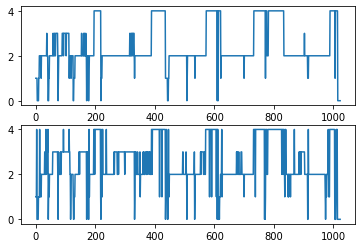

0
0.75390625
0.7750067024731677


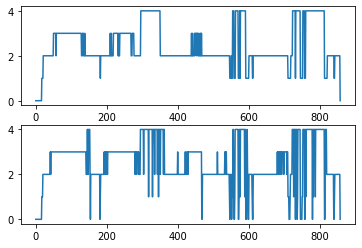

1
0.7729918509895227
0.7811400052534804


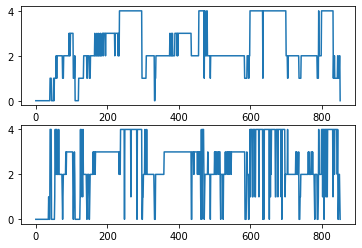

2
0.6631455399061033
0.7003077842623904


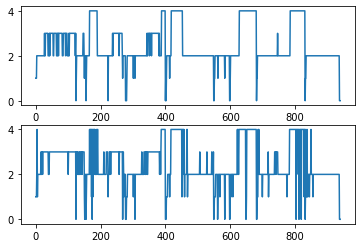

3
0.8319148936170213
0.8452810578161429


In [9]:
test_subjects = os.listdir(pred_path)

# AASM
labels = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R']        
classes = [0, 1, 2, 3, 4]

ACC = 0
BAC = 0
MCC = 0


conf_matrix = np.zeros((len(test_subjects)//2, len(labels), len(labels)))

test_subjects = os.listdir(pred_path)
print(test_subjects)

for i, sub in enumerate(test_subjects):
    i //= 2
    
    if sub.split("_")[-1] == 'softmax.npy':
        continue
        
    # predicted tags
    in_and_out = np.load(os.path.join(pred_path, sub))

    y_true = in_and_out[0]
    y_BENDR = in_and_out[1]
    
    if i == 1:
        y_true_s2 = y_true
        y_BENDR_s2 = y_BENDR
    
    plt.subplot(2,1,1)
    plt.plot(y_true)
    plt.subplot(2,1,2)
    plt.plot(y_BENDR)

    plt.show()
    
    conf_matrix[i, : ,:] = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true
    
    MCC += matthews_corrcoef(y_true, y_BENDR)
    ACC += accuracy_score(y_true, y_BENDR)
    BAC += balanced_accuracy_score(y_true, y_BENDR)
    
    print(i)
    print(accuracy_score(y_true, y_BENDR))
    print(balanced_accuracy_score(y_true, y_BENDR))

[[0.92638889 0.06527778 0.         0.         0.00833333]
 [0.28827886 0.40068462 0.13117978 0.03169536 0.14816139]
 [0.00971421 0.02263493 0.69272983 0.24761563 0.02730541]
 [0.         0.00242718 0.         0.99757282 0.        ]
 [0.03182029 0.06536068 0.03839611 0.00462963 0.85979329]]


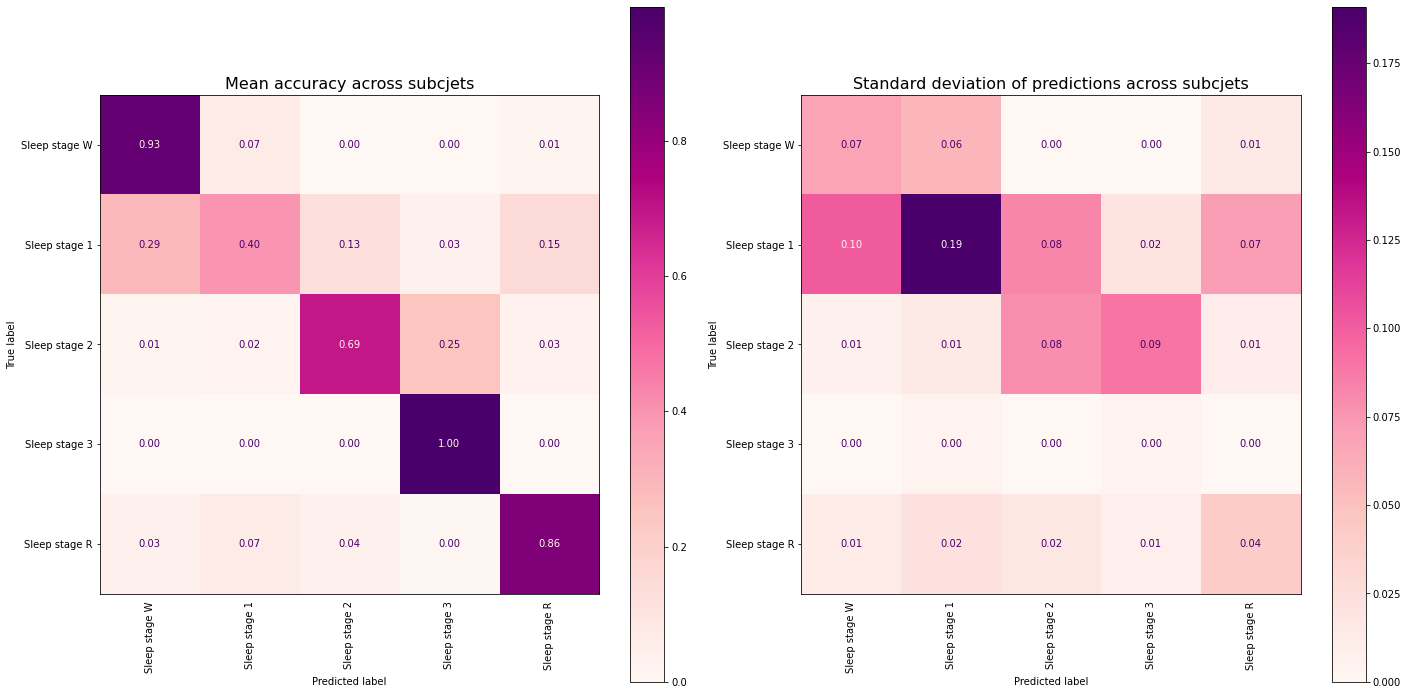

In [10]:
mean_conf = np.mean(conf_matrix, axis = 0)
# mean_conf = conf_matrix[2]
std_conf = np.std(conf_matrix, axis = 0)
print(mean_conf)

cmap = 'RdPu'
values_format = ".2f" 
title_size = 16


f, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title("Mean accuracy across subcjets", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=mean_conf, display_labels=labels).plot(
    include_values=True, cmap=cmap, ax=axes[0], values_format=values_format)
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, rotation=90)


axes[1].set_title("Standard deviation of predictions across subcjets", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=std_conf, display_labels=labels).plot(
    include_values=True, cmap=cmap, ax=axes[1], values_format=values_format)
axes[1].tick_params(axis='x', which='both', bottom=False, left=False, rotation=90)

plt.tight_layout()
plt.show()

In [9]:
## metrykiBENDR-polid-AASM-hpf1-40_emg_filt

print('MCC = ', MCC/4)
print('ACC = ', ACC/4)
print('BAC = ', BAC/4)
print(conf_matrix.shape)

MCC =  0.6275868734556804
ACC =  0.7138330904866514
BAC =  0.7699324910592713
(4, 5, 5)


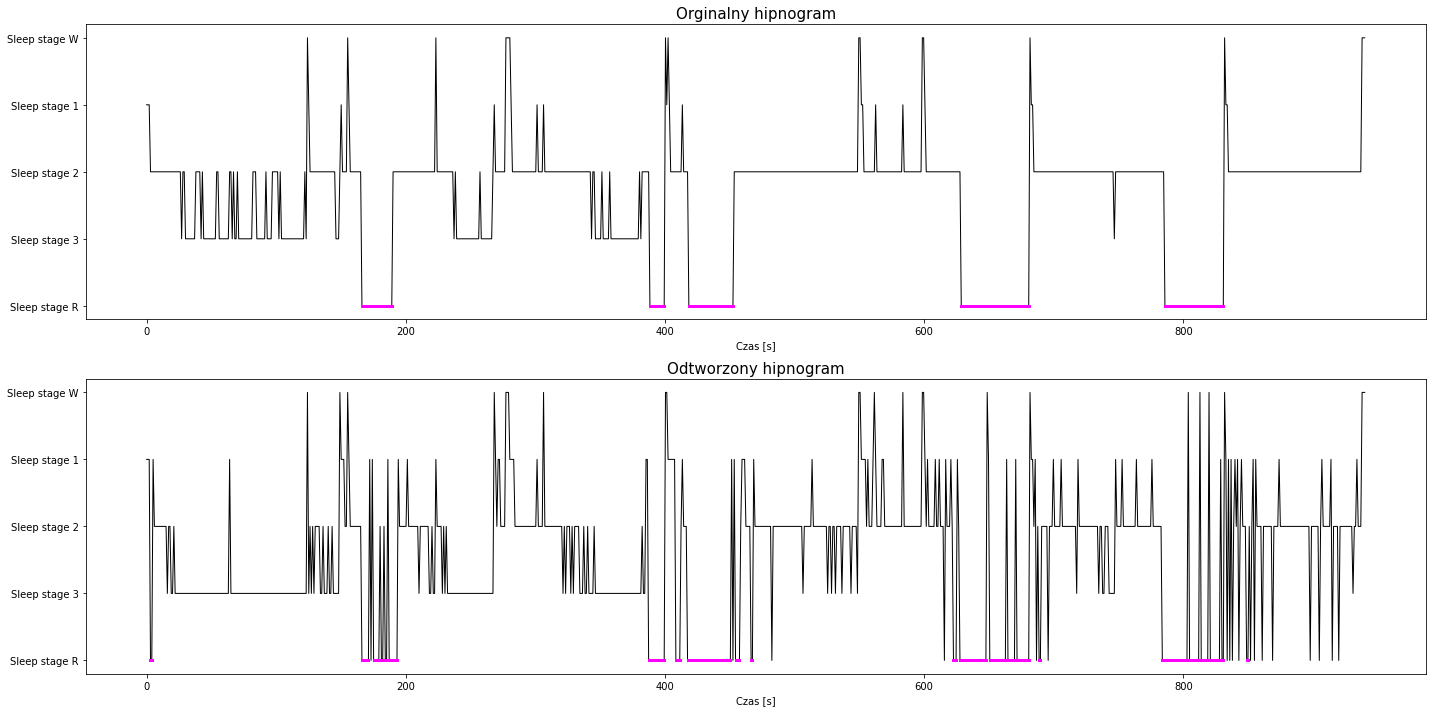

In [14]:
### hipnogram

# AASM
labels = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R']        
classes = [0, 1, 2, 3, 4]

t = np.linspace(0, len(y_true), len(y_true))

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
masked_y = np.ma.masked_where(~(y_true == 4), y_true)

plt.plot(t, 4 - y_true, 'black', linewidth=1)
plt.plot(t, 4 - masked_y, 'magenta', linewidth=3)
plt.title("Orginalny hipnogram", size=15)
plt.yticks(classes[::-1],labels)
plt.xlabel('Czas [s]')


plt.subplot(2,1,2)
masked_y_BENDR = np.ma.masked_where(~(y_BENDR==4), y_BENDR)

plt.plot(t, 4 - y_BENDR, 'black', linewidth=1)
plt.plot(t, 4 - masked_y_BENDR, 'magenta', linewidth=3)
plt.title("Odtworzony hipnogram", size=15)
plt.yticks(classes[::-1],labels)
plt.xlabel('Czas [s]')


plt.tight_layout()
plt.show()

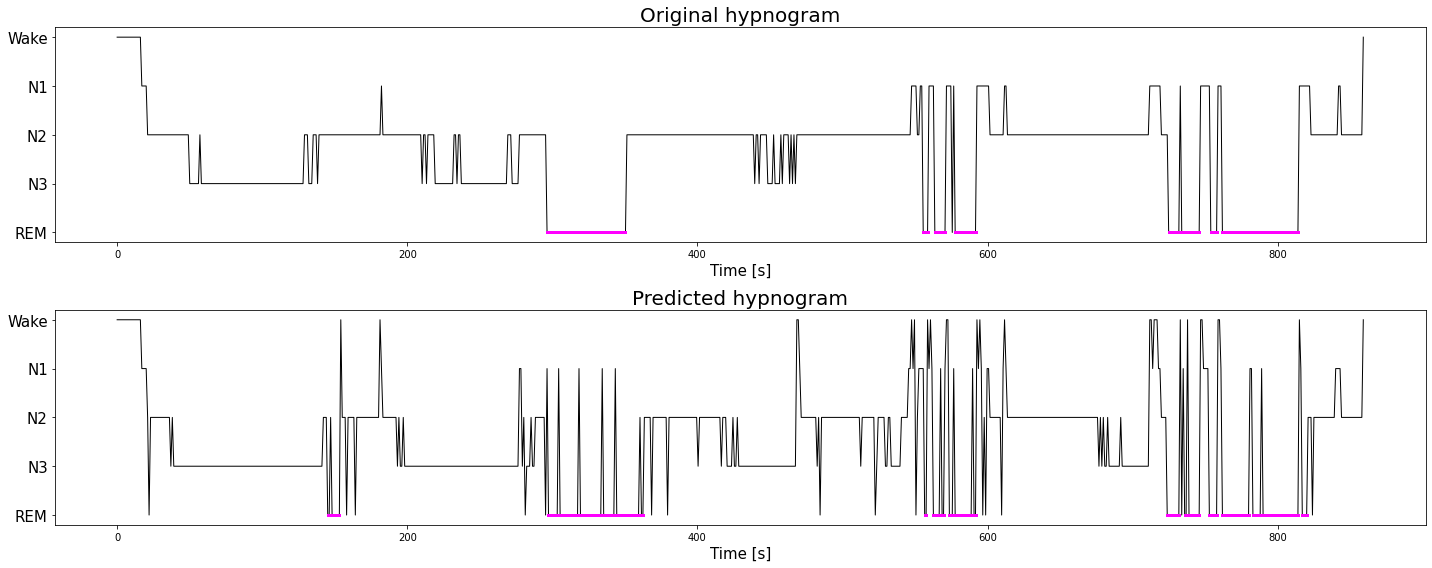

In [31]:
# dla s02

### hipnogram

# AASM
labels = ['Wake', 'N1', 'N2', 'N3', 'REM']        
classes = [0, 1, 2, 3, 4]

t = np.linspace(0, len(y_true_s2), len(y_true_s2))

plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
masked_y = np.ma.masked_where(~(y_true_s2 == 4), y_true_s2)

plt.plot(t, 4 - y_true_s2, 'black', linewidth=1)
plt.plot(t, 4 - masked_y, 'magenta', linewidth=3)
plt.title("Original hypnogram", size=20)
plt.yticks(classes[::-1],labels, size='15')
plt.xlabel('Time [s]', size='15')


plt.subplot(2,1,2)
masked_y_BENDR_s2 = np.ma.masked_where(~(y_BENDR_s2==4), y_BENDR_s2)

plt.plot(t, 4 - y_BENDR_s2, 'black', linewidth=1)
plt.plot(t, 4 - masked_y_BENDR_s2, 'magenta', linewidth=3)
plt.title("Predicted hypnogram", size=20)
plt.yticks(classes[::-1],labels, size='15')
plt.xlabel('Time [s]', size='15')


plt.tight_layout()
plt.show()


In [32]:
# wykres accuracy(ilosc wystąpień) 

from collections import Counter

z = dict(Counter(y_true))
sorted_dict = dict(sorted(z.items()))
print(sorted_dict)

MM = [mean_conf[i,i] for i in range(len(labels))]
print(MM)

{0: 18, 1: 22, 2: 591, 3: 139, 4: 170}
[0.8916666666666667, 0.4832561165426334, 0.6053236572480374, 0.992017259978425, 0.877398754860594]


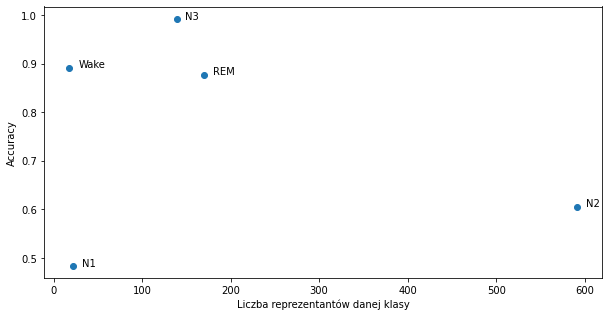

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(list(sorted_dict.values()), MM)
ax.set_xlabel('Liczba reprezentantów danej klasy')
ax.set_ylabel('Accuracy')

for i, txt in enumerate(labels):
    ax.annotate(txt, (list(sorted_dict.values())[i] + 10, MM[i]))

In [ ]:


###


# DALEJ ROBOCZO



####

In [10]:
### NAJLEPSZE I NAJGORSZE PREDYKCJE + WYKREŚLENIE

In [27]:
### dla wersji gdzie zapisujemy softmax

# uśrednione po ludziach:

# pred_path = 'predictions/linear-sleepedf-AASM-pool1-temazepan' #AASM_hpf1_emg' najleszy chyba#
test_subjects = os.listdir(pred_path)

# AASM
labels = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R']        
classes = [0, 1, 2, 3, 4]

ACC = 0
BAC = 0
MCC = 0

conf_matrix = np.zeros((len(test_subjects)//2, len(labels), len(labels)))

for i, sub in enumerate(test_subjects):
    
    i //= 2
    
    if sub.split("_")[-1] == 'softmax.npy':
        continue
        
    # predicted tags
    in_and_out = np.load(os.path.join(pred_path, sub))

    y_true = in_and_out[0]
    y_BENDR = in_and_out[1]
    
    conf_matrix[i, : ,:] = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true
    
    MCC += matthews_corrcoef(y_true, y_BENDR)
    ACC += accuracy_score(y_true, y_BENDR)
    BAC += balanced_accuracy_score(y_true, y_BENDR)
    
    print(i)
    print(accuracy_score(y_true, y_BENDR))
    print(balanced_accuracy_score(y_true, y_BENDR))

0
0.7776484284051223
0.7776438140267927
1
0.6736183524504692
0.4320274565596596
2
0.8627659574468085
0.8155736662061541


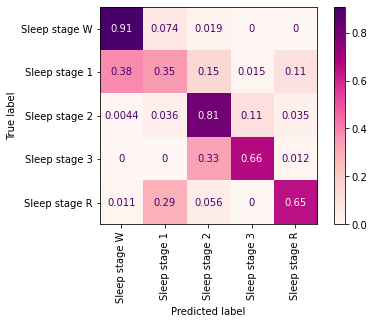

In [28]:
mean_conf = np.mean(conf_matrix, axis = 0)
std_conf = np.std(conf_matrix, axis = 0)


disp = ConfusionMatrixDisplay(confusion_matrix=mean_conf, display_labels=labels)
disp.plot(cmap='RdPu')
plt.xticks(rotation=90)
plt.show()

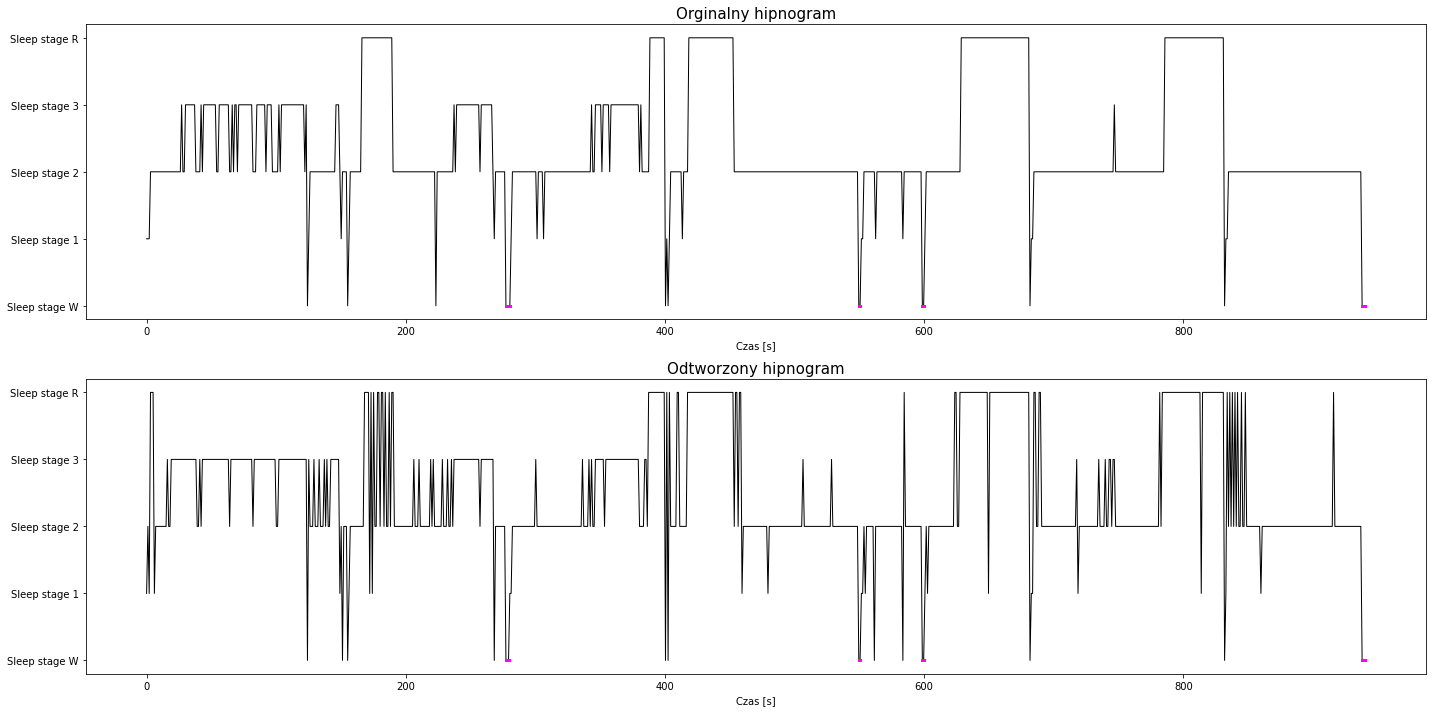

In [29]:
# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]

# AASM
# labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5]

t = np.linspace(0, len(y_true), len(y_true))

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
masked_y = np.ma.masked_where(~(y_true == 0), y_true)

plt.plot(t, y_true, 'black', linewidth=1)
plt.plot(t, masked_y, 'magenta', linewidth=3)
plt.title("Orginalny hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.subplot(2,1,2)
masked_y_BENDR = np.ma.masked_where(~(y_BENDR==0), y_BENDR)

plt.plot(t, y_BENDR, 'black', linewidth=1)
plt.plot(t, masked_y_BENDR, 'magenta', linewidth=3)
plt.title("Odtworzony hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.tight_layout()
plt.show()

In [33]:
### softmax

### dla wersji gdzie zapisujemy softmax

# dla wybranej osoby np. s29 bo ma ładne wyniki

pred_path03 = pred_path + '/' + pred_path.split('/')[1] + '_s03.npy'
pred_softmax_path03 = pred_path + '/' + pred_path.split('/')[1] +  '_s03_softmax.npy'
 

# AASM
labels = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R']        
classes = [0, 1, 2, 3, 4]


in_and_out_labels = np.load(pred_path03)
                     
y_true = in_and_out_labels[0]
y_BENDR = in_and_out_labels[1]
predictions_softmax = np.load(pred_softmax_path03)

print(predictions_softmax)

conf_matrix = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true

MCC = matthews_corrcoef(y_true, y_BENDR)
ACC = accuracy_score(y_true, y_BENDR)
BAC = balanced_accuracy_score(y_true, y_BENDR)

print(accuracy_score(y_true, y_BENDR))
print(balanced_accuracy_score(y_true, y_BENDR))

print(predictions_softmax[:, 3][y_BENDR == 3])

[[4.8482721e-03 9.9341160e-01 2.1794204e-04 4.4744444e-04 1.0748451e-03]
 [5.7697910e-01 2.5643637e-02 3.5153483e-03 7.9090167e-03 3.8595289e-01]
 [6.5611984e-04 9.9738866e-01 4.3396454e-04 4.1557342e-04 1.1057055e-03]
 ...
 [9.9497521e-01 1.7029633e-03 6.4386823e-04 1.6174663e-03 1.0605362e-03]
 [9.9497521e-01 1.7029633e-03 6.4386823e-04 1.6174663e-03 1.0605362e-03]
 [9.9497521e-01 1.7029633e-03 6.4386823e-04 1.6174663e-03 1.0605362e-03]]
0.76171875
0.7565456622853185
[0.80907005 0.9659977  0.95557004 0.8627687  0.9841493  0.79200655
 0.9888594  0.96808183 0.9961234  0.9983234  0.5244902  0.99598855
 0.48992708 0.9721718  0.9977456  0.99112296 0.9989673  0.99596834
 0.99568236 0.9711874  0.99506134 0.99565744 0.99764615 0.99834347
 0.99858785 0.99464613 0.997799   0.8285153  0.76200914 0.49595585
 0.9728     0.7522777  0.9776119  0.99728787 0.97885454 0.99457425
 0.9924975  0.80890566 0.99926025 0.99934083 0.9951278  0.9981634
 0.9990214  0.9966344  0.99972326 0.9984877  0.9969997  0.

In [34]:
# if 3 w tył i 3 w przod są second best to zmieniamy na otoczenie

for i in range(len(y_true)):
    if y_BENDR[i] == 4 and predictions_softmax[i, 4] < 0.6:
        if y_true[i] != y_BENDR[i]:
            print(predictions_softmax[i], y_true[i])
#         print(a)

[0.04407633 0.05559435 0.3214772  0.0815903  0.49726182] 1
[0.02702113 0.15144412 0.21202981 0.02560826 0.5838967 ] 1
[0.3702447  0.09575943 0.02418209 0.06245921 0.44735464] 1
[0.01717924 0.09784582 0.27645597 0.01453194 0.59398705] 2
[0.01905536 0.01481385 0.3691739  0.01088071 0.5860761 ] 1
[0.02681055 0.02307702 0.28634048 0.22680262 0.4369694 ] 2
[0.43371135 0.03003241 0.02676269 0.03663115 0.47286242] 2
[0.02242651 0.40727314 0.02591532 0.01286321 0.5315218 ] 2


In [39]:
# wygladzanie chyba
import heapq

y_wyg = y_true.copy()

for i in range(len(y_true)):
    if y_BENDR[i] == 4 and predictions_softmax[i, 4] < 0.6:
        if y_true[i] != y_BENDR[i]:
            print(predictions_softmax[i], y_true[i], i)
            
            sorted_indices = np.argsort(predictions_softmax[i])[::-1]

        # The second largest value will be at index 1 after sorting
            second_largest_index = sorted_indices[1]
            print(y_BENDR[i], second_largest_index)

[0.04407633 0.05559435 0.3214772  0.0815903  0.49726182] 1 44
4 2
[0.02702113 0.15144412 0.21202981 0.02560826 0.5838967 ] 1 45
4 2
[0.3702447  0.09575943 0.02418209 0.06245921 0.44735464] 1 112
4 0
[0.01717924 0.09784582 0.27645597 0.01453194 0.59398705] 2 841
4 2
[0.01905536 0.01481385 0.3691739  0.01088071 0.5860761 ] 1 916
4 2
[0.02681055 0.02307702 0.28634048 0.22680262 0.4369694 ] 2 961
4 2
[0.43371135 0.03003241 0.02676269 0.03663115 0.47286242] 2 974
4 0
[0.02242651 0.40727314 0.02591532 0.01286321 0.5315218 ] 2 986
4 1


In [37]:
sum = 0
for i in range(len(y_true)):
    if y_BENDR[i] == 4  and y_true[i] == 4:
        sum += 1
print(sum)

207


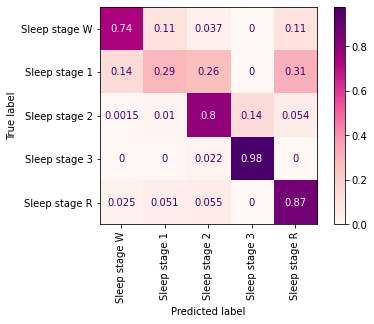

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)


disp.plot(cmap='RdPu')
plt.xticks(rotation=90)
plt.show()

In [55]:
# load examplatory signal

# signal_path =  '/dmj/fizmed/jjakubowska/physionet.org/files/sleep-edfx/1.0.0/sleep-telemetry/placebo_test/s03/ST7241J0-PSG.edf'
raw = mne.io.read_raw_edf(signal_path)
# picks = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'A1', 'A2']  


raw_highpass = raw.copy().load_data()
raw_highpass.filter(l_freq=1, h_freq=49)


Extracting EDF parameters from /dmj/fizmed/jjakubowska/physionet.org/files/sleep-edfx/1.0.0/sleep-telemetry/placebo_test/s03/ST7241J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3260999  =      0.000 ... 32609.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 331 samples (3.310 sec)



<RawEDF | ST7241J0-PSG.edf, 5 x 3261000 (32610.0 s), ~124.4 MB, data loaded>

In [26]:
# znajdz najwyższą predykcję z błędnych predykcji s3
    # znajdz najwyższą błędną predykcję
    # powinno być stadium 1, a predykacja na s3

def explore_best_predictions(raw1, y_true, y_BENDR, predictions_softmax, true=1, predicted=1):

    s3_false_positive_s1 = [i for i in range(len(y_true)) if (y_true[i]==true) and (y_BENDR[i]==predicted)]
    s3_preds_false_positive_s1 = np.max(predictions_softmax[s3_false_positive_s1], axis=1)
    s3_preds_false_positive_s1_max = np.argmax(predictions_softmax[s3_false_positive_s1, 1])
    ind_false_pred = s3_false_positive_s1[s3_preds_false_positive_s1_max]

    print(f'Maksymalna zła predykcja: {predictions_softmax[s3_false_positive_s1[s3_preds_false_positive_s1_max]]} dla ind = {ind_false_pred}')

    raw1.plot(duration=30, start=30*ind_false_pred, n_channels=2, scalings=1e-4)

Maksymalna zła predykcja: [4.8202854e-02 9.1314644e-01 3.8312710e-04 1.5769330e-04 3.8109794e-02] dla ind = 11


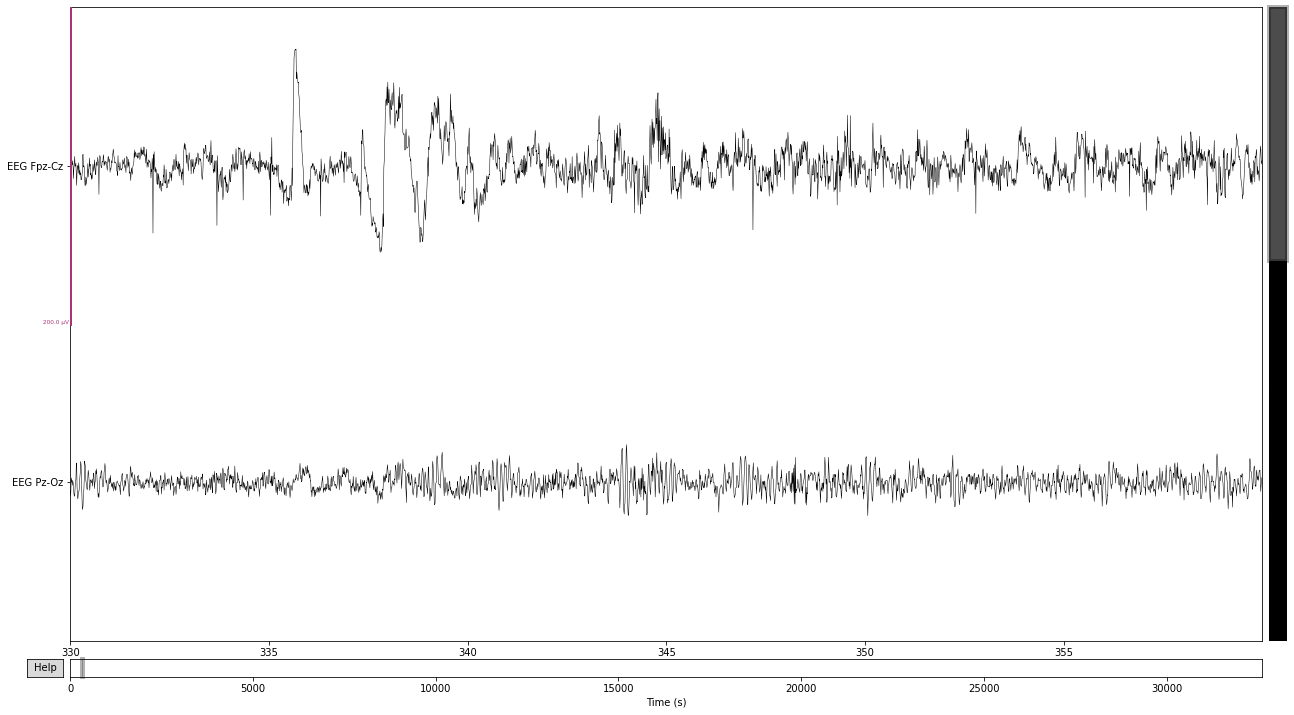

In [28]:
plt.rcParams["figure.figsize"] = [18,10]
explore_best_predictions(raw_highpass, y_true, y_BENDR, predictions_softmax, true=1, predicted=1)